In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [17]:
# Загрузка датасета
file_path = "updated_pollution_dataset.csv"  # Укажите имя файла, если он находится в той же папке
df = pd.read_csv(file_path)
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [21]:
# Уникальные значения целевой переменной
vals = df["Air Quality"].unique()

from sklearn.preprocessing import LabelEncoder

# Определяем количественные столбцы для кластеризации
cols_for_clusters = [
    "Temperature", "Humidity", "PM2.5", "PM10", 
    "NO2", "SO2", "CO", "Proximity_to_Industrial_Areas", "Population_Density"
]

# Создаем копию датасета с количественными столбцами
X = df[cols_for_clusters].copy()

# Преобразуем целевую переменную в числовой формат
le = LabelEncoder()
y = le.fit_transform(df["Air Quality"])  # Преобразуем категории в числа
yvals = df["Air Quality"]  # Сохраняем оригинальные значения целевой переменной


Линейные методы уменьшения размерности (Linear Dimensionality Reduction Methods)


Метод главных компонентов (Principal Component Analysis, PCA)

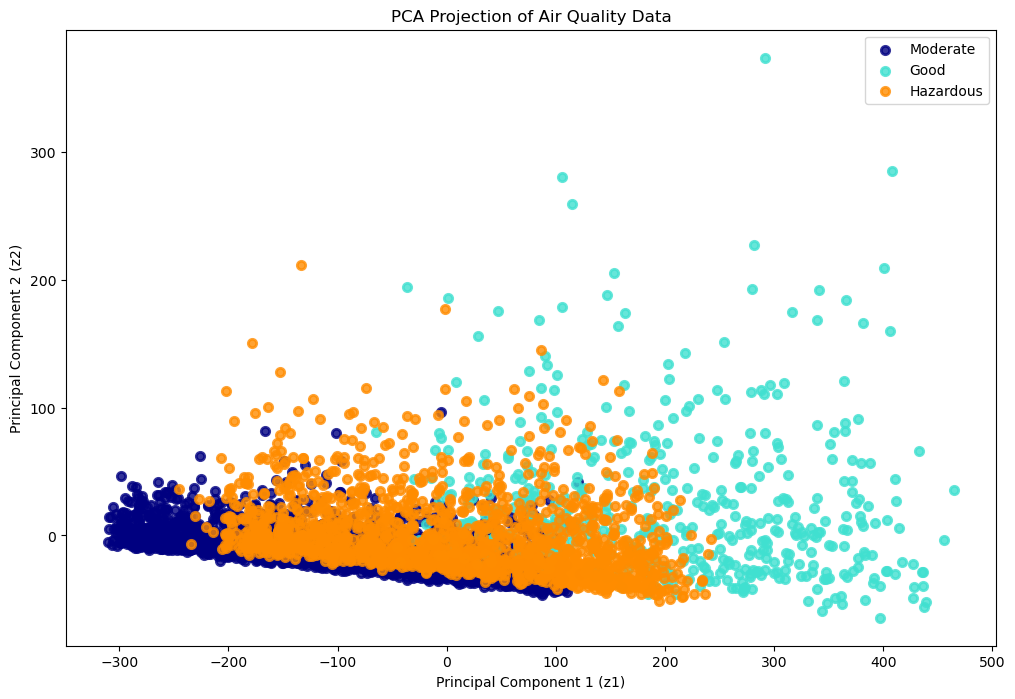

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Применяем PCA для уменьшения размерности до 2D
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)  # Применяем fit_transform сразу

# Создаем график
plt.figure(figsize=(12, 8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Для отрисовки необходимо учесть, что `y` теперь числовой
for color, i, target_name in zip(colors, range(len(vals)), vals):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

# Оформляем график
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Principal Component 1 (z1)")
plt.ylabel("Principal Component 2 (z2)")
plt.title("PCA Projection of Air Quality Data")
plt.show()

In [25]:
pca.explained_variance_ratio_

array([0.9386382 , 0.04787276])

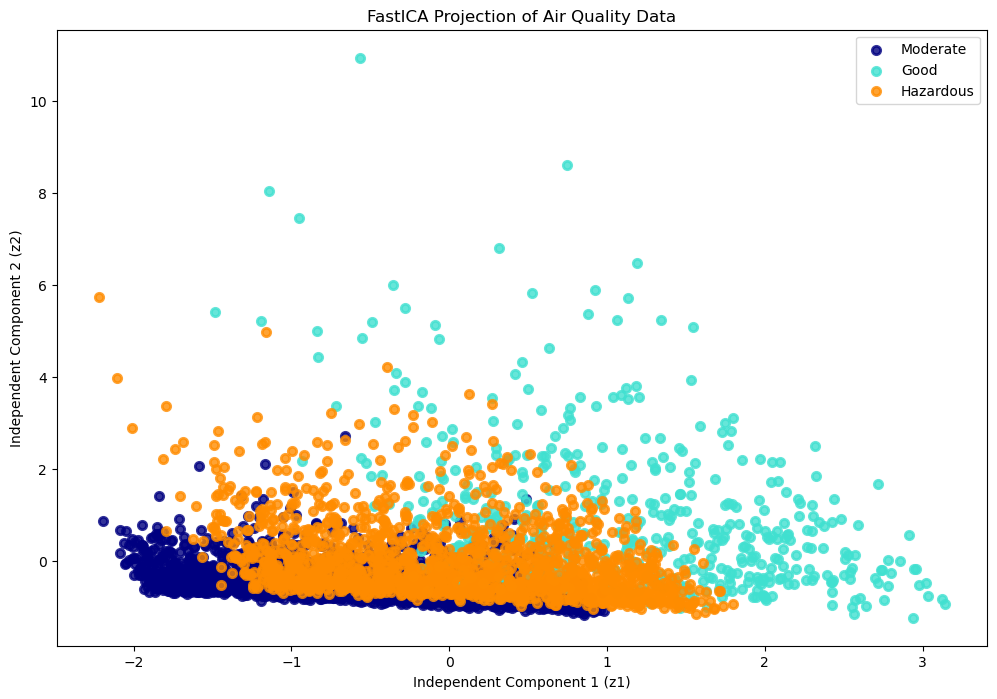

In [27]:
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# Применяем FastICA для уменьшения размерности до 2D
fast_ica = FastICA(n_components=2, random_state=42)  # Добавляем фиксированный random_state для воспроизводимости
X_new = fast_ica.fit_transform(X)

# Создаем график
plt.figure(figsize=(12, 8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Для отрисовки используем `vals` и числовой `y`
for color, i, target_name in zip(colors, range(len(vals)), vals):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

# Оформляем график
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Independent Component 1 (z1)")
plt.ylabel("Independent Component 2 (z2)")
plt.title("FastICA Projection of Air Quality Data")
plt.show()

Нелинейные методы уменьшения размерности

Kernel PCA

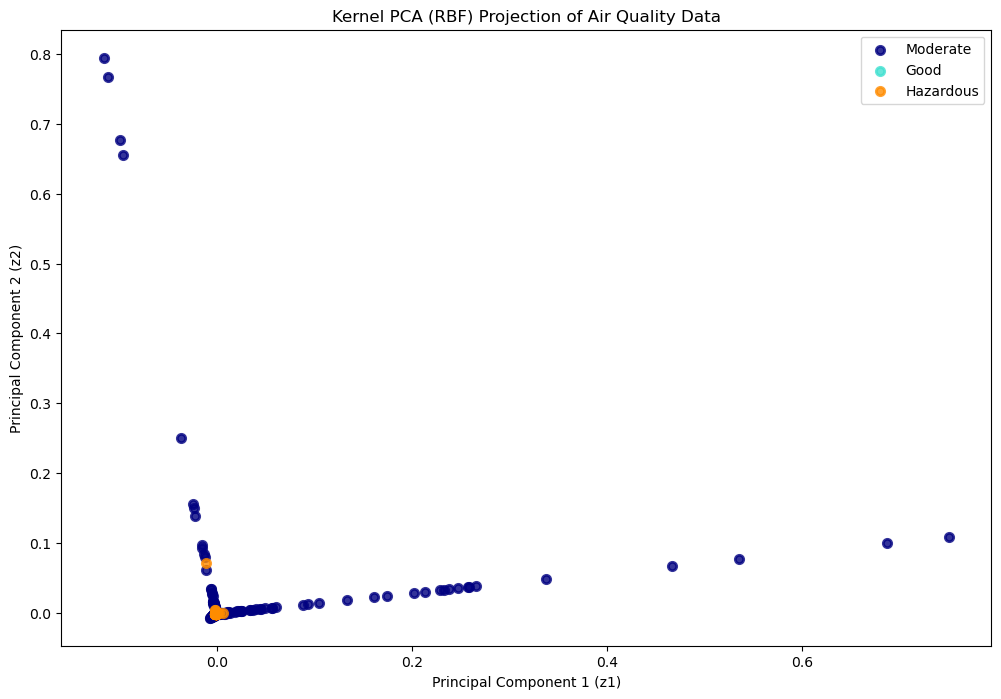

In [31]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Применяем Kernel PCA с RBF ядром
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, random_state=42)  # Добавлен random_state
X_new = rbf_pca.fit_transform(X)

# Создаем график
plt.figure(figsize=(12, 8))
colors = ["navy", "turquoise", "darkorange"]
lw = 2

# Для отрисовки используем `vals` и числовую `y`
for color, i, target_name in zip(colors, range(len(vals)), vals):
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )

# Оформляем график
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Principal Component 1 (z1)")
plt.ylabel("Principal Component 2 (z2)")
plt.title("Kernel PCA (RBF) Projection of Air Quality Data")
plt.show()

tSNE

Initial Shape of X:  (5000, 9)
New Shape of X:  (5000, 2)
Kullback-Leibler divergence after optimization:  1.0857653617858887
No. of iterations:  999


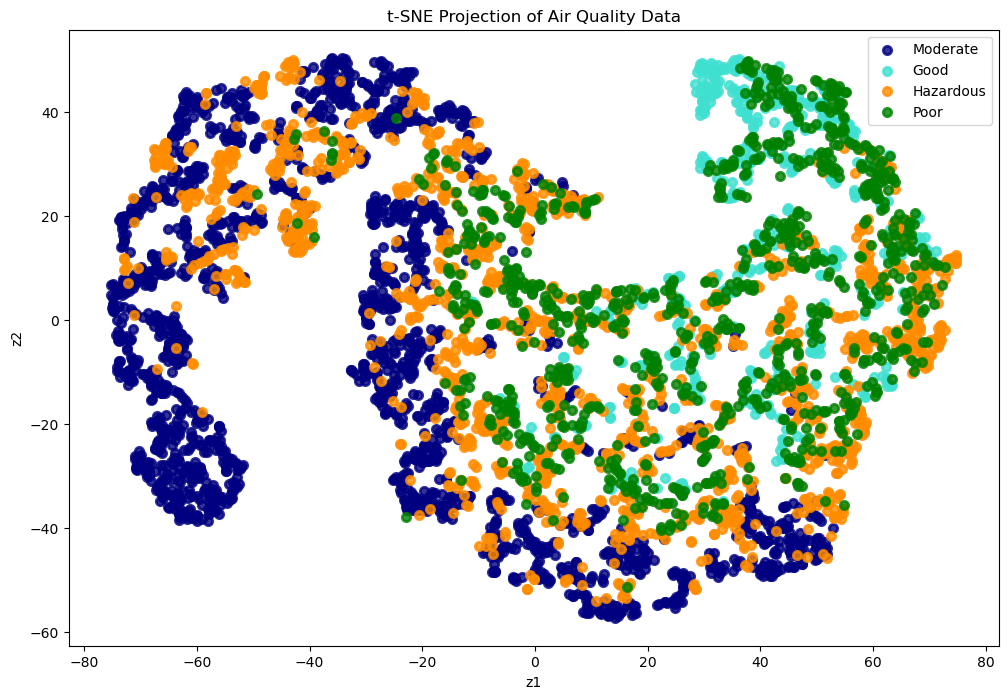

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Применение t-SNE для снижения размерности
tsne = TSNE(n_components=2, random_state=42)
X_new = tsne.fit_transform(X)

# Вывод результатов
print('Initial Shape of X: ', X.shape)
print('New Shape of X: ', X_new.shape)
print('Kullback-Leibler divergence after optimization: ', tsne.kl_divergence_)
print('No. of iterations: ', tsne.n_iter_)

# Построение графика
plt.figure(figsize=(12, 8))
colors = ["navy", "turquoise", "darkorange", "green", "purple", "red"]
lw = 2

for color, i in zip(colors, range(len(vals))):  # Используем 'vals' для определения классов
    plt.scatter(
        X_new[y == i, 0], X_new[y == i, 1], 
        color=color, alpha=0.8, lw=lw, label=vals[i]
    )

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("z1")
plt.ylabel("z2")
plt.title("t-SNE Projection of Air Quality Data")
plt.show()


DBSCAN

Estimated no. of clusters: 5
Estimated no. of noise points: 59
v_measure = 0.026895028139383197


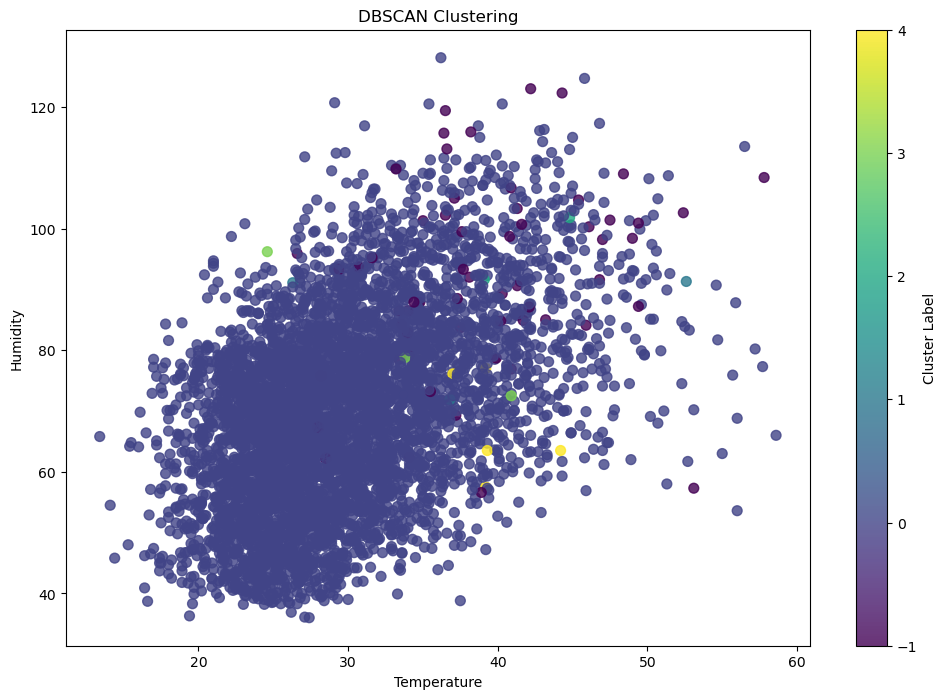

In [85]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, v_measure_score
import matplotlib.pyplot as plt

# Применение DBSCAN к данным
dbscan_cluster1 = DBSCAN(eps=30, min_samples=3)  # Подберите параметры eps и min_samples для вашего датасета
dbscan_cluster1.fit(X)

# Получение меток кластеров
labels = dbscan_cluster1.labels_

# Определение количества кластеров
N_clus = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Подсчет количества шумовых точек
n_noise = list(labels).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Оценка v_measure (целевой переменной y)
v_measure = v_measure_score(y, labels) if len(set(labels)) > 1 else "Not applicable (single cluster)"
print('v_measure =', v_measure)

# Визуализация кластеров
plt.figure(figsize=(12, 8))

# Используем labels для цветового кодирования кластеров
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)

plt.colorbar(label="Cluster Label")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("DBSCAN Clustering")
plt.show()


Доступные метрики расстояния:
{'cityblock': <function manhattan_distances at 0x00000252C63CE840>, 'cosine': <function cosine_distances at 0x00000252C63CE980>, 'euclidean': <function euclidean_distances at 0x00000252C63CDF80>, 'haversine': <function haversine_distances at 0x00000252C63CE700>, 'l2': <function euclidean_distances at 0x00000252C63CDF80>, 'l1': <function manhattan_distances at 0x00000252C63CE840>, 'manhattan': <function manhattan_distances at 0x00000252C63CE840>, 'precomputed': None, 'nan_euclidean': <function nan_euclidean_distances at 0x00000252C63CE160>}


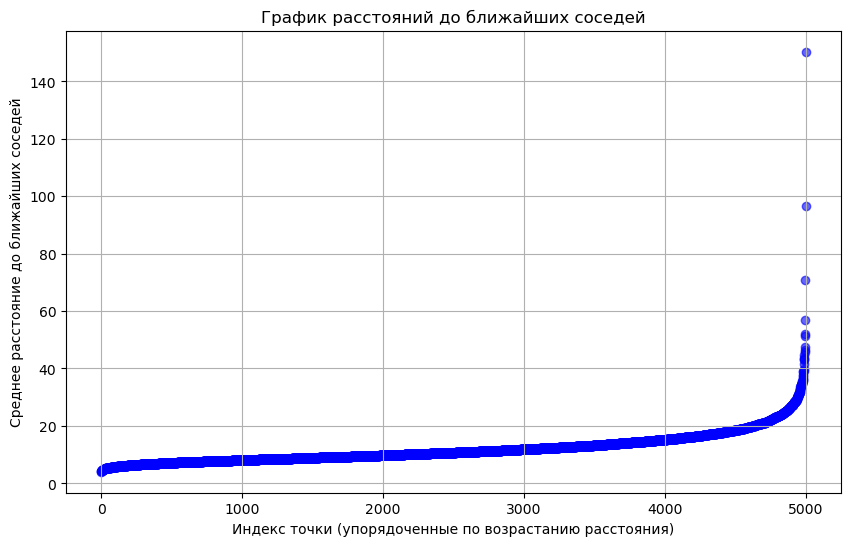

In [73]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import sklearn.metrics.pairwise

# Параметры
min_samples = 3  # Количество ближайших соседей

# Инициализация модели NearestNeighbors
knn = NearestNeighbors(n_neighbors=min_samples, metric='l2')
knn.fit(X)

# Вычисление расстояний до ближайших соседей
dists, inds = knn.kneighbors(X)

# Среднее расстояние до ближайших соседей (без учета самого себя)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()

# Возможные метрики расстояния (для информации)
available_metrics = sklearn.metrics.pairwise.distance_metrics()
print("Доступные метрики расстояния:")
print(available_metrics)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dists_ar)), dists_ar, color='blue', alpha=0.6)
plt.title("График расстояний до ближайших соседей")
plt.xlabel("Индекс точки (упорядоченные по возрастанию расстояния)")
plt.ylabel("Среднее расстояние до ближайших соседей")
plt.grid()
plt.show()


DBSCAN для определения выбросов

In [94]:
dbscan = DBSCAN(eps = 30, min_samples = min_samples)
print(dbscan)

DBSCAN(eps=30, min_samples=3)


In [96]:
pred = dbscan.fit_predict(X)
# Number of Clusters
labels=dbscan.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))


Estimated no. of clusters: 5
Estimated no. of noise points: 59
v_measure = 0.026895028139383197


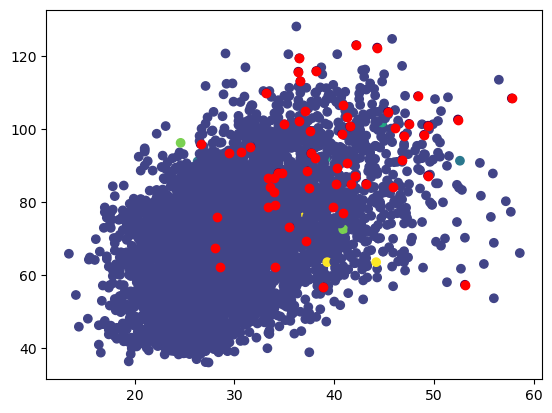

In [100]:
# у анномалий - класс -1, ищем все номера строк с таким классом, потом отбираем эти строки из начального набора данных

anom_index = [i for i in range(len(pred)) if pred[i] == -1]
values = X.loc[anom_index]
plt.scatter( X[cols_for_clusters[0]], X[cols_for_clusters[1]],c=dbscan_cluster1.labels_)
plt.scatter(values[cols_for_clusters[0]], values[cols_for_clusters[1]], color='r')
plt.show()